In [1]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
df = pd.read_csv('data/Hotel_Reservations.csv')

In [4]:
df.head(3)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


In [5]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

 ## column description

- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

## Exploratory data analysis (EDA) 

<AxesSubplot:>

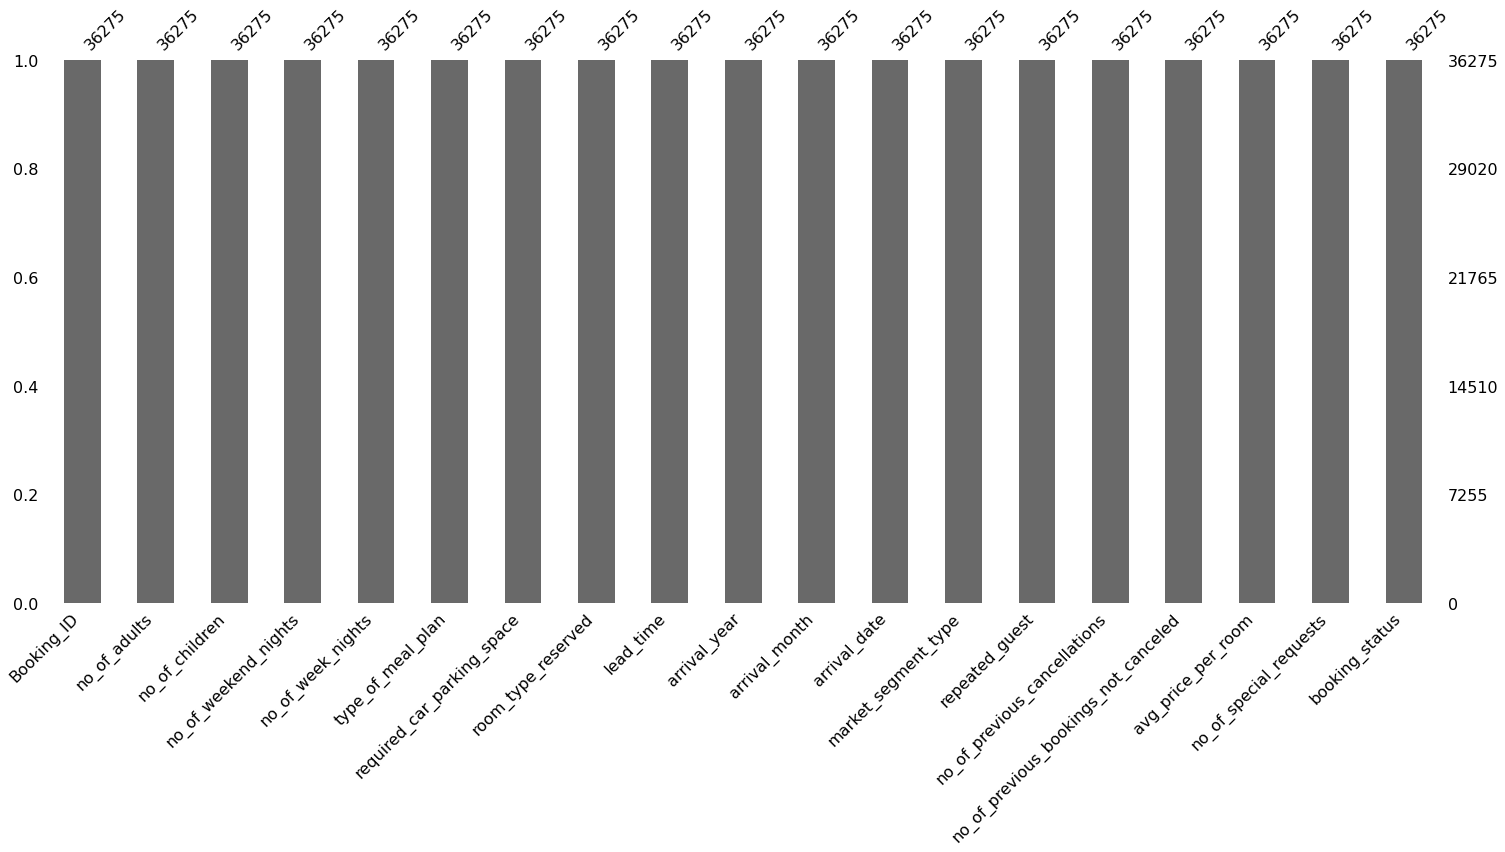

In [7]:
msno.bar(df)

In [8]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

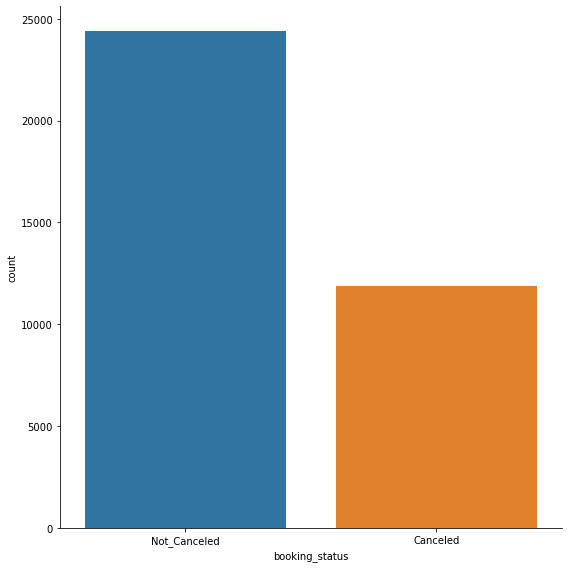

In [9]:
sns.catplot(data=df, x="booking_status", kind="count",height=8)

In [10]:
print('Canceled_rate is',len(df[df['booking_status'] == 'Canceled'])*100/len(df),'%')

Canceled_rate is 32.76361130254997 %


Imbalance dataset have to under sampling the data.

### create new feature

In [11]:
df['total_guest'] = df['no_of_adults'] + df['no_of_children']

In [12]:
df['total_night'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

In [13]:
df['date'] = pd.to_datetime(dict(year=df.arrival_year, month=df.arrival_month, day=df.arrival_date), errors='coerce')

<AxesSubplot:>

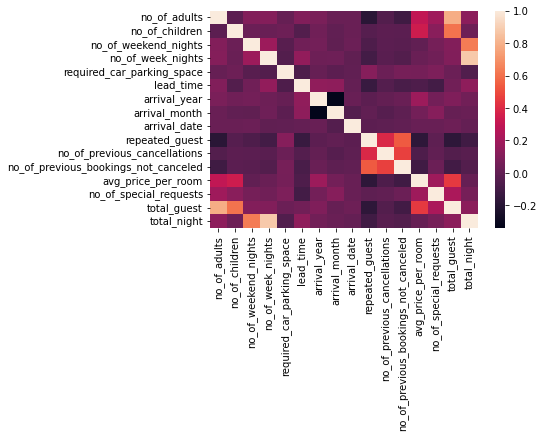

In [14]:
sns.heatmap(df.corr())

Which month is the high season customer booking 

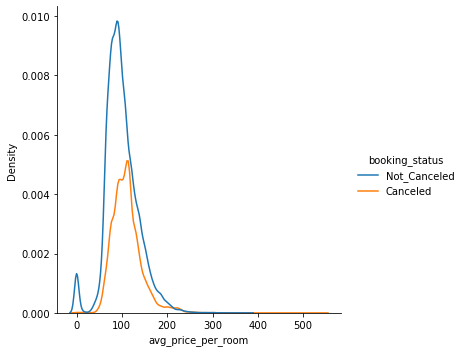

In [15]:
sns.displot(df,x="avg_price_per_room",hue="booking_status", kind="kde")

In [16]:
# remove the outliner of the data
def removeoutliner(col):
    sorted(col)
    q1,q2 = col.quantile([0.25,0.75])
    IQR = q2 - q1
    lowb = q1 -(1.5*IQR)
    upb = q2 +(1.5*IQR)
    return lowb,upb
lowb,upb = removeoutliner(df["avg_price_per_room"])

In [17]:
df_filtered = df[(df["avg_price_per_room"] < upb) & (df["avg_price_per_room"] > lowb)]

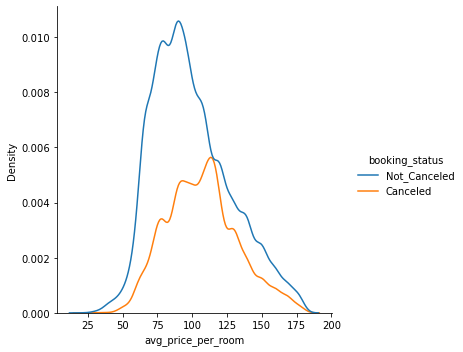

In [18]:
sns.displot(df_filtered,x="avg_price_per_room",hue="booking_status", kind="kde")

In [19]:
print("the average price per room is",df_filtered['avg_price_per_room'].mean())
print("the average price per room customer not canceled  is",df_filtered[df_filtered['booking_status'] == 'Not_Canceled']['avg_price_per_room'].mean())
print("the average price per room customer canceled is",df_filtered[df_filtered['booking_status'] == 'Canceled']['avg_price_per_room'].mean())

the average price per room is 102.09358194279767
the average price per room customer not canceled  is 99.61147763647375
the average price per room customer canceled is 107.10023819911004


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 4'),
  Text(2, 0, 'Room_Type 2'),
  Text(3, 0, 'Room_Type 6'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 7'),
  Text(6, 0, 'Room_Type 3')])

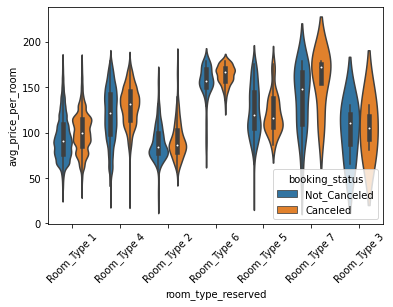

In [20]:
sns.violinplot(data=df_filtered, x="room_type_reserved", y="avg_price_per_room", hue="booking_status")
plt.xticks(rotation=45)

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

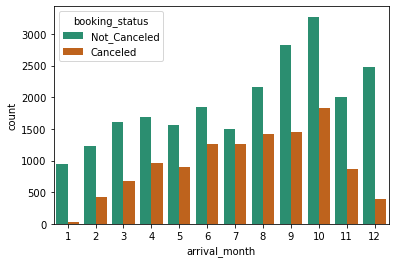

In [21]:
sns.countplot(data=df_filtered, x="arrival_month",palette="Dark2", hue="booking_status")

### From the data show that in the first month of the least cancel book and in the middle of the year is the most cancel hotel booking.

<AxesSubplot:xlabel='arrival_year', ylabel='count'>

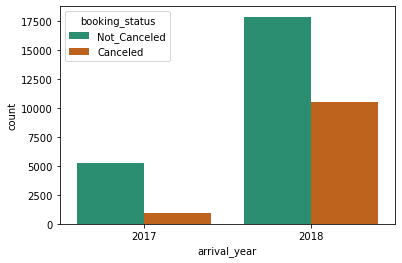

In [22]:
sns.countplot(data=df_filtered, x="arrival_year",palette="Dark2", hue="booking_status")

There might be some problem in year 2018 that cause booking canceled

In [23]:
df_2018 = df_filtered[df_filtered['arrival_year'] == 2018]
df_2017 = df_filtered[df_filtered['arrival_year'] == 2017]

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

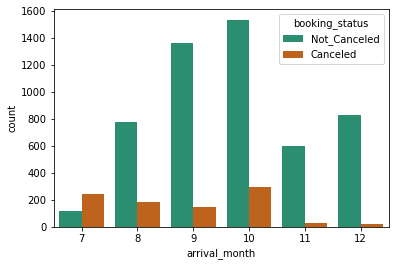

In [24]:
sns.countplot(data=df_2017, x="arrival_month",palette="Dark2", hue="booking_status")    

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

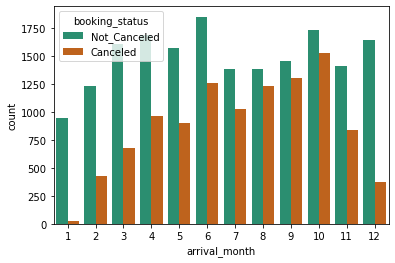

In [25]:
sns.countplot(data=df_2018, x="arrival_month",palette="Dark2", hue="booking_status")    

The data show that the data started from 7/2017 -12/2018

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

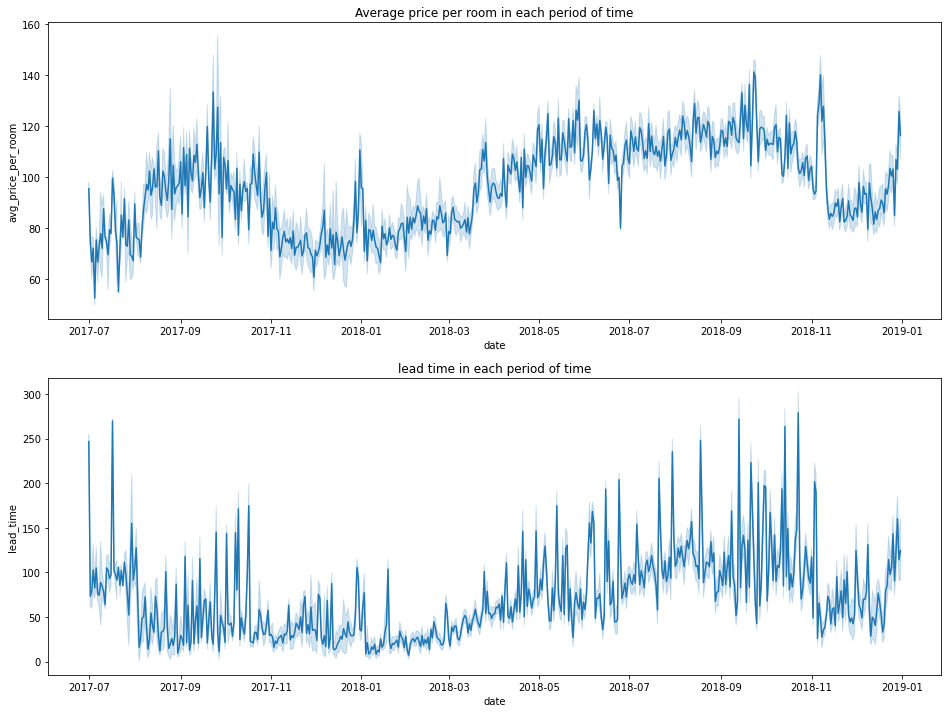

In [70]:
fig, ax = plt.subplots(2, 1, figsize=(16, 12))
sns.lineplot(data=df_filtered, x="date",y="avg_price_per_room",ax=ax[0])
sns.lineplot(data=df_filtered, x="date",y="lead_time",ax=ax[1])
ax[0].set_title('Average price per room in each period of time')
ax[1].set_title('lead time in each period of time')

ax[0].xticks(rotation=45)
ax[1].xticks(rotation=45)

plt.tight_layout()

low avg price in 11/2017 - 03/2018

<AxesSubplot:xlabel='lead_time', ylabel='booking_status'>

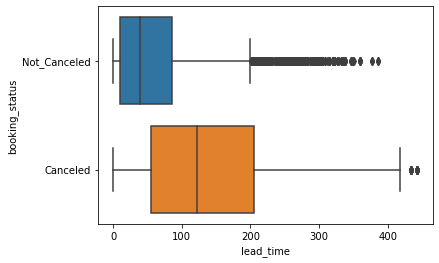

In [26]:
sns.boxplot(data=df, x="lead_time", y="booking_status")

### from the data we can see that if customer booking for a long term( > 100 day about 3month up) likely to cancel the booking while customer who booking soon likely to less canceled the booking

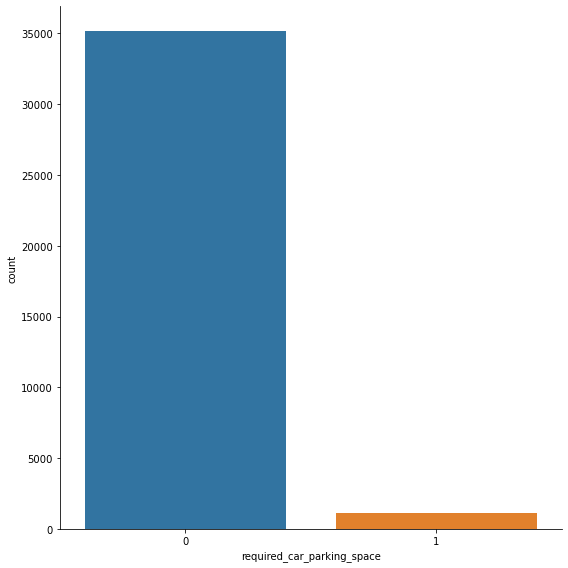

In [27]:
sns.catplot(data=df, x="required_car_parking_space", kind="count",height=8)

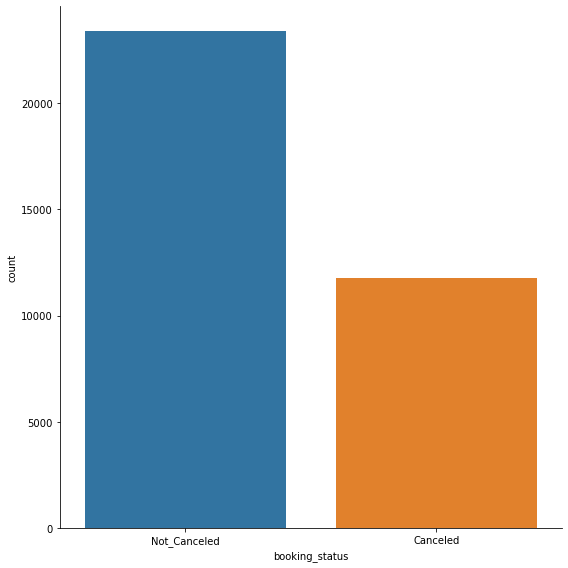

In [28]:
# look in the case where required car parking space = 0
sns.catplot(data=df[df["required_car_parking_space"] == 0], x="booking_status", kind="count",height=8)

In [29]:
# customer no need the car parking space
df_no_car_parking=df[df["required_car_parking_space"] == 0]
total_number = len(df_no_car_parking["required_car_parking_space"])
number_cancel = len(df_no_car_parking["required_car_parking_space"][df_no_car_parking['booking_status'] == 'Canceled'])
print("total number of customer no need the car parking space is",total_number)
print("total number of cancel booking",number_cancel)
print("prob of cancel | customer no need the car parking space",number_cancel*100/total_number)

total number of customer no need the car parking space is 35151
total number of cancel booking 11771
prob of cancel | customer no need the car parking space 33.486956274359194


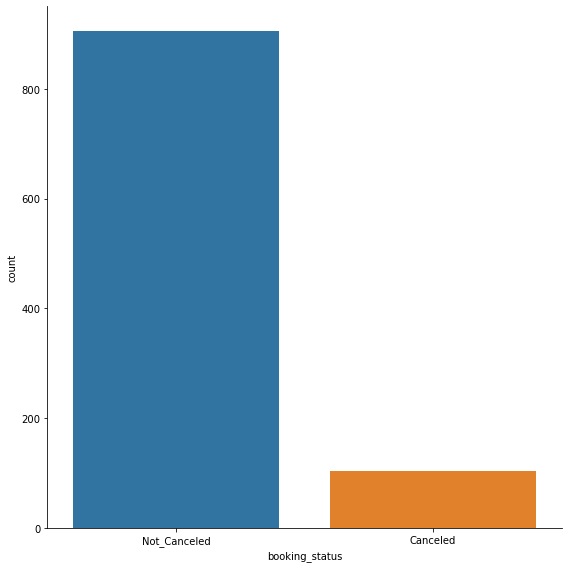

In [30]:
# look in the case where required car parking space = 1 
sns.catplot(data=df_filtered[df_filtered["required_car_parking_space"] == 1], x="booking_status", kind="count",height=8)

In [31]:
# customer need the car parking space
df_car_parking=df_filtered[df_filtered["required_car_parking_space"] == 1]
total_number_need = len(df_car_parking["required_car_parking_space"])
number_Not_cancel = len(df_car_parking["required_car_parking_space"][df_car_parking['booking_status'] == 'Canceled'])
print("total number of customer need the car parking space is",total_number_need)
print("total number of cancel booking",number_Not_cancel)
print("prob of cancel | customer need the car parking space",number_Not_cancel*100/total_number_need)

total number of customer need the car parking space is 1009
total number of cancel booking 104
prob of cancel | customer need the car parking space 10.307234886025768


### from the stat, show us the 
- prob of customer how going to cancel the booking given the customer need the car parking space is 10.3%
- prob of customer how going to cancel the booking given the customer no need the car parking space is 33.8%

<AxesSubplot:xlabel='no_of_adults', ylabel='count'>

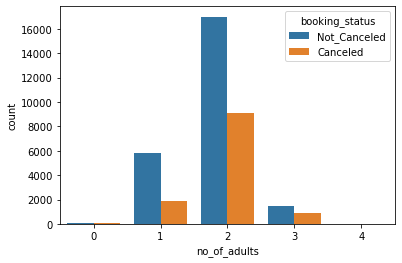

In [32]:
sns.countplot(data=df, x="no_of_adults", hue="booking_status")

In [33]:
## baysiean prob given 
def prob_cal(df,col_name):
    unique_list= pd.unique(df[col_name])
    for i in unique_list:
        df_all = df[df[col_name] == i]
        print('probability booking is Canceled given',i,'is',len(df_all[df_all['booking_status'] == 'Canceled'])*100/len(df_all))

In [34]:
prob_cal(df,"no_of_adults")

probability booking is Canceled given 2 is 34.92799142025433
probability booking is Canceled given 1 is 24.119558154645873
probability booking is Canceled given 3 is 37.246439361242984
probability booking is Canceled given 0 is 31.654676258992804
probability booking is Canceled given 4 is 18.75


<AxesSubplot:xlabel='no_of_children', ylabel='count'>

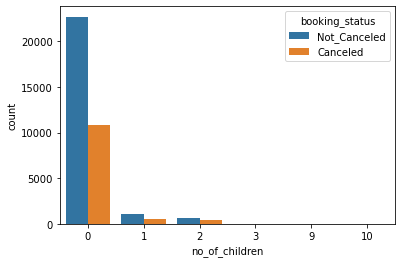

In [35]:
sns.countplot(data=df, x="no_of_children", hue="booking_status")

In [36]:
prob_cal(df,"no_of_children")

probability booking is Canceled given 0 is 32.40908955535039
probability booking is Canceled given 2 is 43.194706994328925
probability booking is Canceled given 1 is 33.374536464771325
probability booking is Canceled given 3 is 26.31578947368421
probability booking is Canceled given 10 is 0.0
probability booking is Canceled given 9 is 50.0


<AxesSubplot:xlabel='no_of_weekend_nights', ylabel='count'>

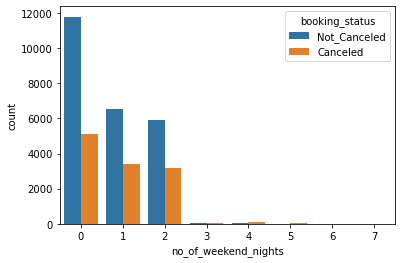

In [37]:
sns.countplot(data=df, x="no_of_weekend_nights", hue="booking_status")

In [55]:
prob_cal(df,"no_of_weekend_nights")

probability booking is Canceled given 1 is 34.337168584292144
probability booking is Canceled given 2 is 34.803219049718884
probability booking is Canceled given 0 is 30.18610715979137
probability booking is Canceled given 4 is 64.34108527131782
probability booking is Canceled given 3 is 48.36601307189542
probability booking is Canceled given 6 is 80.0
probability booking is Canceled given 5 is 85.29411764705883
probability booking is Canceled given 7 is 100.0


<AxesSubplot:xlabel='no_of_week_nights', ylabel='count'>

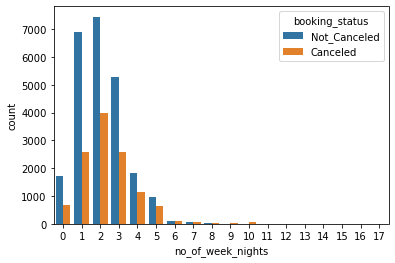

In [49]:
sns.countplot(data=df, x="no_of_week_nights", hue="booking_status")

In [56]:
prob_cal(df,"no_of_weekend_nights")

probability booking is Canceled given 1 is 34.337168584292144
probability booking is Canceled given 2 is 34.803219049718884
probability booking is Canceled given 0 is 30.18610715979137
probability booking is Canceled given 4 is 64.34108527131782
probability booking is Canceled given 3 is 48.36601307189542
probability booking is Canceled given 6 is 80.0
probability booking is Canceled given 5 is 85.29411764705883
probability booking is Canceled given 7 is 100.0


### more number of day customer at hotel , the more likely the customer is going to cancel the booking

<AxesSubplot:xlabel='no_of_adults', ylabel='avg_price_per_room'>

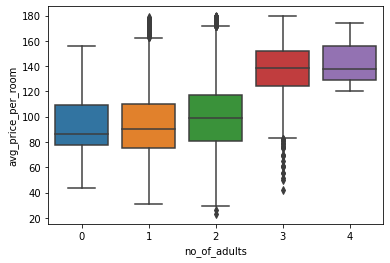

In [50]:
sns.boxplot(data=df_filtered[df_filtered.total_guest<=5], x="no_of_adults", y="avg_price_per_room")

<AxesSubplot:xlabel='no_of_children', ylabel='avg_price_per_room'>

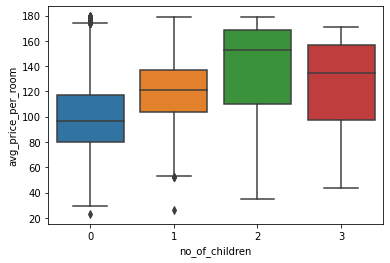

In [51]:
sns.boxplot(data=df_filtered[df_filtered.total_guest<=5], x="no_of_children", y="avg_price_per_room")

<AxesSubplot:xlabel='total_guest', ylabel='avg_price_per_room'>

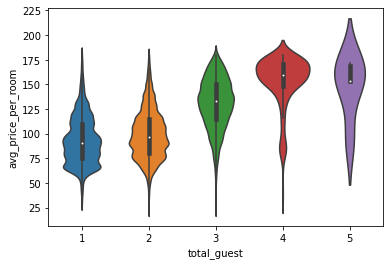

In [52]:
sns.violinplot(data=df_filtered[df_filtered.total_guest<=5], x="total_guest", y="avg_price_per_room")

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='count'>

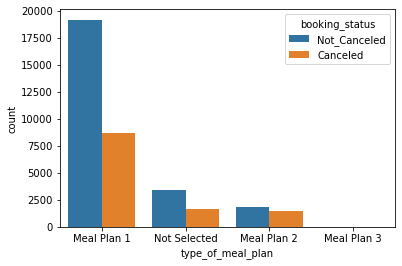

In [53]:
sns.countplot(data=df, x="type_of_meal_plan", hue="booking_status")

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='avg_price_per_room'>

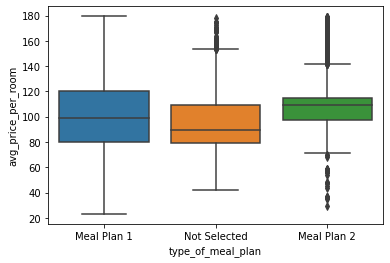

In [54]:
sns.boxplot(data=df_filtered, x="type_of_meal_plan", y="avg_price_per_room")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 4'),
  Text(2, 0, 'Room_Type 2'),
  Text(3, 0, 'Room_Type 6'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 7'),
  Text(6, 0, 'Room_Type 3')])

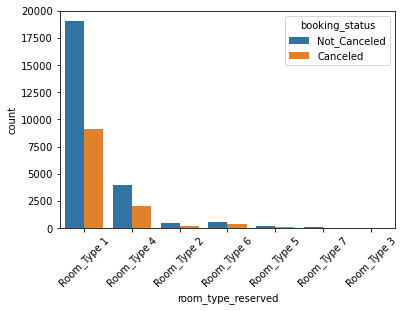

In [44]:
sns.countplot(data=df, x="room_type_reserved", hue="booking_status")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 4'),
  Text(2, 0, 'Room_Type 2'),
  Text(3, 0, 'Room_Type 6'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 7'),
  Text(6, 0, 'Room_Type 3')])

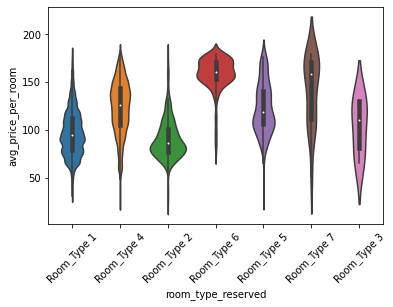

In [45]:
sns.violinplot(data=df_filtered, x="room_type_reserved", y="avg_price_per_room")
plt.xticks(rotation=45)

<AxesSubplot:xlabel='market_segment_type', ylabel='count'>

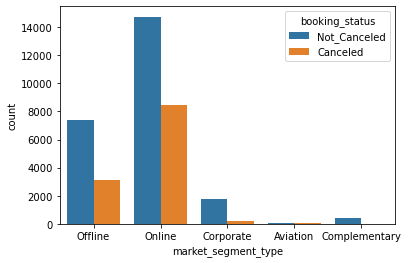

In [46]:
sns.countplot(data=df, x="market_segment_type", hue="booking_status")

In [47]:
prob_cal(df,"market_segment_type")

probability booking is Canceled given Offline is 29.94870820668693
probability booking is Canceled given Online is 36.508141638666324
probability booking is Canceled given Corporate is 10.907288051561725
probability booking is Canceled given Aviation is 29.6
probability booking is Canceled given Complementary is 0.0


### from the data show that coporate and complementary segment is the customer who is less canceled

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Offline'),
  Text(1, 0, 'Online'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Aviation'),
  Text(4, 0, 'Complementary')])

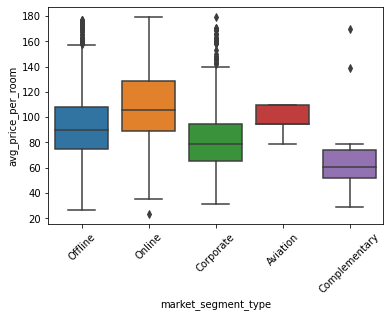

In [48]:
sns.boxplot(data=df_filtered, x="market_segment_type", y="avg_price_per_room")
plt.xticks(rotation=45)